In [61]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
# pd.set_option('display.width', None)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 100)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [62]:
path_data = '..\data\df_finviz_n_ratios_merged.pkl'
path_corr = '..\data\df_corr_emv_matrix.pkl'
path_cov = '..\data\df_cov_emv_matrix.pkl'

In [63]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [64]:
df_data = pd.read_pickle(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)

df_corr = pd.read_pickle(path_corr)
df_cov = pd.read_pickle(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1379
count_after above threshold (0.75): 1050
Percentage above threshold (0.75): 76.14%

df_cov.shape: (1379, 1379)


Symbol    UBS    INTC    ADI     IBN     TD    SAN   MELI   SMFG   LRCX  \
Symbol                                                                    
UBS    0.0006  0.0003 0.0003  0.0000 0.0002 0.0005 0.0002 0.0003 0.0006   
INTC   0.0003  0.0028 0.0001 -0.0000 0.0000 0.0001 0.0001 0.0003 0.0003   
ADI    0.0003  0.0001 0.0006  0.0000 0.0001 0.0003 0.0001 0.0002 0.0005   
IBN    0.0000 -0.0000 0.0000  0.0001 0.0000 0.0000 0.0000 0.0001 0.0001   
TD     0.0002  0.0000 0.0001  0.0000 0.0001 0.0002 0.0001 0.0001 0.0002   

Symbol    KKR     UPS      MO    APP      SO     AMT    ICE     ELV   WELL  \
Symbol                                                                       
UBS    0.0006  0.0002 -0.0000 0.0010  0.0000  0.0001 0.0001 -0.0001 0.0002   
INTC   0.0001  0.0001 -0.0000 0.0008  0.0001 -0.0001 0.0001 -0.0001 0.0000   
ADI    0.0003  0.0001 -0.0000 0.0007  0.0001  0.0001 0.0001 -0.0000 0.0001   
IBN    0.0001 -0.0000 -0.0000 0.0003 -0.0000 -0.0000 0.0000  0.0000 0.0000   
TD     0.0002  0.0001  0.0000 0.0002  0.0000  0.0001 0.0001 -0.0000 0.0000   

Symbol   KLAC    ENB   EMXC     HYG   DYNF    VOT     SLV   DGRW   FNDF  \
Symbol                                                                    
UBS    0.0005 0.0001 0.0002  0.0000 0.0003 0.0003  0.0001 0.0002 0.0002   
INTC   0.0004 0.0001 0.0000 -0.0000 0.0001 0.0000  0.0002 0.0000 0.0000   
ADI    0.0005 0.0000 0.0001  0.0000 0.0002 0.0002  0.0000 0.0002 0.0001   
IBN    0.0001 0.0000 0.0000  0.0000 0.0000 0.0000  0.0000 0.0000 0.0000   
TD     0.0002 0.0001 0.0001  0.0000 0.0001 0.0001 -0.0000 0.0001 0.0001   

Symbol   VOOG    PFF     TIP     GDX    IWV   AVUV   CGDV   VCLT    EMB  \
Symbol                                                                    
UBS    0.0003 0.0001 -0.0000  0.0001 0.0003 0.0002 0.0002 0.0000 0.0000   
INTC   0.0001 0.0000  0.0000  0.0004 0.0001 0.0001 0.0000 0.0000 0.0000   
ADI    0.0003 0.0000 -0.0000  0.0001 0.0002 0.0002 0.0002 0.0000 0.0000   
IBN    0.0001 0.0000 -0.0000  0.0001 0.0000 0.0000 0.0000 0.0000 0.0000   
TD     0.0001 0.0000 -0.0000 -0.0000 0.0001 0.0001 0.0001 0.0000 0.0000   

Symbol   MOAT    EWJ   MTUM    VTIP     SCI     PSO    PNW    SWKS    HLI  \
Symbol                                                                      
UBS    0.0002 0.0002 0.0004 -0.0000 -0.0001  0.0001 0.0001  0.0003 0.0002   
INTC   0.0000 0.0001 0.0002 -0.0000  0.0000  0.0000 0.0001  0.0001 0.0003   
ADI    0.0002 0.0001 0.0003 -0.0000  0.0001  0.0001 0.0001  0.0004 0.0001   
IBN    0.0000 0.0000 0.0001 -0.0000 -0.0000 -0.0000 0.0000 -0.0000 0.0001   
TD     0.0001 0.0001 0.0001 -0.0000  0.0000  0.0000 0.0001  0.0002 0.0001   

Symbol    AVTR    FUTU   NBIX    ITT    RTO     PR   ALLE     UHS    VTRS  \
Symbol                                                                      
UBS     0.0002  0.0006 0.0002 0.0003 0.0005 0.0003 0.0001  0.0000  0.0001   
INTC   -0.0001 -0.0001 0.0002 0.0001 0.0007 0.0001 0.0000 -0.0003 -0.0003   
ADI     0.0003  0.0004 0.0002 0.0003 0.0004 0.0002 0.0002  0.0000  0.0003   
IBN     0.0000  0.0001 0.0000 0.0001 0.0000 0.0001 0.0000  0.0000  0.0000   
TD      0.0001  0.0003 0.0001 0.0002 0.0001 0.0002 0.0001  0.0001  0.0001   

Symbol    WTRG   BSAC     LKQ     KMX     SNX    AIZ    FCX    CHTR     LYG  \
Symbol                                                                        
UBS     0.0000 0.0002 -0.0000  0.0002  0.0002 0.0001 0.0005  0.0001  0.0003   
INTC    0.0000 0.0002 -0.0002 -0.0002 -0.0000 0.0001 0.0006 -0.0001 -0.0001   
ADI     0.0000 0.0001  0.0001  0.0002  0.0001 0.0000 0.0002  0.0002  0.0002   
IBN    -0.0000 0.0001 -0.0000 -0.0000  0.0000 0.0000 0.0001 -0.0000 -0.0000   
TD     -0.0000 0.0001  0.0000  0.0001  0.0001 0.0001 0.0001  0.0001  0.0001   

Symbol     HLT    ALL    MET   MPLX    ADSK    MNST    TFC     CM     NSC  \
Symbol                                                                      
UBS     0.0003 0.0001 0.0004 0.0002  0.0003  0.0000 0.0003 0.0002  0.0002   
INTC   -0.


df_corr.shape: (1379, 1379)


Symbol    UBS    INTC    ADI     IBN     TD    SAN   MELI   SMFG   LRCX  \
Symbol                                                                    
UBS    1.0000  0.2106 0.5738  0.0527 0.6635 0.7785 0.3944 0.7051 0.7514   
INTC   0.2106  1.0000 0.0516 -0.0199 0.0694 0.0704 0.0543 0.3987 0.2021   
ADI    0.5738  0.0516 1.0000  0.0980 0.5112 0.4905 0.2401 0.4178 0.6450   
IBN    0.0527 -0.0199 0.0980  1.0000 0.1282 0.1727 0.2343 0.3178 0.1774   
TD     0.6635  0.0694 0.5112  0.1282 1.0000 0.6550 0.2319 0.5634 0.6246   

Symbol    KKR     UPS      MO    APP      SO     AMT    ICE     ELV   WELL  \
Symbol                                                                       
UBS    0.7059  0.3593 -0.1555 0.5399  0.0732  0.3257 0.6587 -0.1413 0.4667   
INTC   0.0265  0.0651 -0.0051 0.2024  0.1153 -0.1039 0.1247 -0.1289 0.0054   
ADI    0.3404  0.3402 -0.0299 0.3657  0.2584  0.2249 0.4242 -0.0319 0.2627   
IBN    0.3562 -0.1156 -0.0759 0.3923 -0.2680 -0.0390 0.2544  0.1868 0.2777   
TD     0.5033  0.5088  0.0662 0.2306  0.1673  0.3066 0.5164 -0.2461 0.2382   

Symbol   KLAC    ENB   EMXC     HYG   DYNF    VOT     SLV   DGRW   FNDF  \
Symbol                                                                    
UBS    0.7143 0.2672 0.6438  0.6392 0.7894 0.7690  0.1667 0.7333 0.8041   
INTC   0.2682 0.1303 0.0575 -0.2128 0.1291 0.0511  0.3489 0.0793 0.0212   
ADI    0.7066 0.1145 0.5379  0.6468 0.6818 0.6269  0.0433 0.7441 0.5494   
IBN    0.2334 0.3491 0.3113  0.1153 0.3212 0.2575  0.3005 0.1613 0.2107   
TD     0.6370 0.3767 0.5267  0.7326 0.7327 0.6839 -0.1724 0.8273 0.6780   

Symbol   VOOG    PFF     TIP     GDX    IWV   AVUV   CGDV   VCLT    EMB  \
Symbol                                                                    
UBS    0.7625 0.5793 -0.3098  0.3136 0.8075 0.6803 0.8077 0.0440 0.4327   
INTC   0.1381 0.1610  0.0128  0.4239 0.1312 0.1640 0.0483 0.1005 0.0068   
ADI    0.6393 0.4149 -0.0532  0.2287 0.7086 0.5617 0.6952 0.1871 0.4613   
IBN    0.3126 0.3652 -0.0585  0.3160 0.2744 0.2875 0.3153 0.0022 0.1236   
TD     0.6787 0.5895 -0.2080 -0.0110 0.7668 0.7453 0.7701 0.0341 0.2610   

Symbol   MOAT    EWJ   MTUM    VTIP     SCI     PSO    PNW    SWKS    HLI  \
Symbol                                                                      
UBS    0.7092 0.8007 0.7903 -0.4416 -0.1604  0.2549 0.4303  0.3536 0.5315   
INTC   0.0121 0.1463 0.1784 -0.1637  0.0241  0.0041 0.2293  0.0318 0.2781   
ADI    0.7330 0.4684 0.5833 -0.1371  0.1049  0.3760 0.4078  0.4999 0.3438   
IBN    0.0696 0.2707 0.3403 -0.1330 -0.0832 -0.0816 0.1236 -0.0552 0.4148   
TD     0.7001 0.7008 0.6375 -0.3162  0.1362  0.0978 0.4793  0.3677 0.3254   

Symbol    AVTR    FUTU   NBIX    ITT    RTO     PR   ALLE     UHS    VTRS  \
Symbol                                                                      
UBS     0.2344  0.4405 0.3213 0.6547 0.6271 0.3722 0.2503  0.0101  0.1838   
INTC   -0.0449 -0.0296 0.1949 0.0561 0.4027 0.0826 0.0003 -0.2862 -0.1662   
ADI     0.3860  0.3330 0.2954 0.6086 0.5816 0.2364 0.3691  0.0514  0.3880   
IBN     0.0968  0.2407 0.1207 0.2961 0.1508 0.3346 0.0974  0.1908  0.0924   
TD      0.2088  0.4408 0.3673 0.6994 0.3038 0.5239 0.4288  0.1984  0.1619   

Symbol    WTRG   BSAC     LKQ     KMX     SNX    AIZ    FCX    CHTR     LYG  \
Symbol                                                                        
UBS     0.0536 0.5744 -0.0360  0.4775  0.6072 0.3363 0.5318  0.3100  0.5640   
INTC    0.0125 0.2130 -0.2821 -0.1904 -0.0157 0.0895 0.3218 -0.0750 -0.0555   
ADI     0.1096 0.3162  0.2207  0.4143  0.4269 0.1263 0.2455  0.4078  0.4346   
IBN    -0.2135 0.4054 -0.2542 -0.0448  0.3004 0.1910 0.4228 -0.1049 -0.1348   
TD     -0.0045 0.3662  0.2754  0.5192  0.5000 0.3414 0.3370  0.4736  0.5223   

Symbol     HLT    ALL    MET   MPLX    ADSK    MNST    TFC     CM     NSC  \
Symbol                                                                      
UBS     0.5988 0.3078 0.7530 0.5411  0.6399  0.0413 0.7234 0.6735  0.5732   
INTC   -0.


df_data.shape: (1050, 51)


,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3207060.0000,1.2800,31.1500,-14.7500,-3.3282,-10.7000,-9.8700,-13.8400,-4.1200,23.2400,-9.3800,-9.1300,-6.2700,-15.7800,2.4300,-17.9200,30.1200,6.8200,3.7000,2.6500,60.0318,53.4100,1.1200,213.4900,1.8200,-3.4209,-5.2437,0.5329,-10.6096,-10.3560,0.2230,-8.4257,-8.2416,0.2389,-8.0973,-7.9894,0.2667,-2.8380,-3.3148,0.6203,-2.4062,-2.9231,0.6701,-0.6282,-0.8026,0.8987,0.8462,1.2290,1.1584
NVDA,NVIDIA Corp,"Technology, Semiconductors",2968750.0000,1.9100,49.3200,-9.4000,11.8805,7.9700,-7.2200,-9.9200,4.0700,32.3800,-1.2700,-5.9000,-4.6800,-20.5400,16.1300,-20.5400,60.9300,6.9300,4.6500,5.3700,275.8447,271.0300,1.0200,121.6700,5.2700,10.5851,371.3951,34.0865,17.0463,677.7190,86.3846,3.0386,4.8328,1.6381,-1.2318,-1.5621,0.8259,0.4263,0.5639,1.0704,-0.2448,-0.3083,0.9588,0.3886,0.5071,1.0687,0.8000,1.1217,1.1428
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2888550.0000,0.9900,42.2500,-7.8100,2.1317,-1.2100,-5.0100,-12.3500,-8.1500,-6.4300,-1.9800,-5.7900,-8.4000,-13.3400,3.0900,-17.0400,3.0900,9.6700,2.2800,2.2500,19.9115,23.0700,0.8600,388.5600,2.5800,4.1176,13.0064,2.1587,5.4796,14.4380,2.8190,0.0303,0.0474,1.0053,-2.4462,-3.3156,0.6752,-2.6036,-3.3480,0.6500,-2.4457,-3.0515,0.6445,-1.0483,-1.3153,0.8255,-0.3706,-0.4759,0.9382
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",2097820.0000,1.3700,35.8800,-9.7700,0.6918,-0.6500,-13.5300,-12.0400,7.2800,12.8600,-5.3200,-10.5900,-0.7200,-18.3800,3.7200,-18.3800,30.5700,6.8800,3.0300,3.2000,37.9909,38.5500,0.9900,197.9500,2.0900,-1.1004,-2.0043,0.8214,3.4011,5.4600,1.6879,-2.8393,-3.5483,0.6524,-3.8587,-4.4789,0.5562,-5.3214,-5.7778,0.4400,-2.5121,-3.0229,0.6721,0.2431,0.3435,1.0398,0.4551,0.6317,1.0789
GOOG,Alphabet Inc,"Communication Services, Internet Content & Inf...",2029870.0000,1.0100,37.4900,-11.9800,0.9881,-4.6300,-9.6000,-10.1400,10.1700,20.0500,-4.3600,-10.5100,-5.3300,-19.6800,2.6800,-19.6800,18.7700,5.1200,2.6900,2.6200,18.3788,19.4000,0.9500,167.6200,1.7500,-2.1081,-3.5496,0.6838,-0.1964,-0.3056,0.9707,-0.3376,-0.4413,0.9488,-4.1129,-4.7805,0.5497,-5.1787,-5.5033,0.4162,-2.3012,-2.7399,0.6816,0.1565,0.2170,1.0266,0.6018,0.8633,1.1101


,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000,1050.0000
mean,68229.6286,1.0051,46.1250,0.0533,1.1291,-1.5797,-4.0796,-4.0005,4.5901,11.3598,-2.5297,-2.9508,-0.1488,-11.8191,9.7612,-16.9954,30.2837,3.4118,2.9735,2.8306,6.2365,6.0643,1.0237,106.6629,2.0757,-25.4561,17841.3573,17813.1924,0.5774,4117.4479,4098.9660,-1.9597,-1.1217,0.9698,-1.6039,-1.2377,0.9120,-0.7882,-0.3728,0.9876,-0.2835,-0.0764,1.0017,-0.0352,0.1006,1.0159,0.4323,0.7148,1.0920
std,218856.8984,0.5764,10.4294,13.4411,3.1020,4.0076,9.9856,12.9652,22.3251,44.5657,5.0454,8.6141,12.9484,10.1746,9.8933,13.1141,59.9940,4.6969,1.7079,1.7369,14.4776,13.1033,0.5367,118.5177,1.9363,4808.2872,38264.3450,38275.8259,9.5264,19823.5668,19826.6760,4.3847,7.1036,0.8626,3.3372,5.1812,0.6065,2.9359,4.3069,0.5155,1.8081,2.7134,0.3421,1.1171,1.6811,0.2093,0.8470,1.3438,0.1723
min,3080.0000,-0.7800,16.1600,-66.5100,-9.9089,-20.0800,-55.8700,-67.4500,-56.4600,-68.6500,-31.7000,-55.2900,-50.4000,-70.9100,-0.6100,-79.6900,-0.1900,0.0200,0.0100,0.0100,0.3313,0.7517,0.3600,2.1500,-6.3900,-100000.0000,-15.8745,0.0000,-45.8497,-15.2057,0.0000,-16.7333,-12.0820,0.0570,-13.7800,-10.7848,0.1034,-9.7268,-8.9252,0.1881,-5.2143,-5.5707,0.3155,-3.6118,-4.1267,0.5316,-2.0996,-2.5229,0.6986
25%,11280.0000,0.6500,37.7425,-7.8175,-0.3043,-3.7975,-10.0700,-11.7975,-6.5175,-5.2200,-5.1625,-8.0100,-6.7000,-17.0450,3.1600,-24.4225,8.6875,0.8000,2.0000,1.8400,1.3146,1.5025,0.7600,37.7650,0.9325,-0.1437,-0.2837,0.9747,-5.2750,-6.6841,0.4268,-4.9846,-5.8658,0.4554,-4.2148,-4.9320,0.5205,-3.1418,-3.7482,0.5951,-1.6862,-2.1136,0.7488,-0.7959,-1.0713,0.8684,-0.0939,-0.1338,0.9845
50%,21775.0000,0.9800,45.1600,0.1400,0.8709,-1.5100,-2.5150,-3.9550,0.8600,5.0600,-1.8350,-2.0500,-0.8350,-9.1500,6.9850,-14.8000,17.9050,1.9600,2.8050,2.5500,2.6159,2.6200,0.9200,69.9300,1.9700,2.8774,7.7385,1.6894,0.3050,0.5716,1.0568,-2.2503,-2.9360,0.6964,-1.6019,-2.1556,0.7756,-0.6854,-0.9348,0.8908,-0.3634,-0.4945,0.9401,-0.1136,-0.1667,0.9802,0.4465,0.6223,1.0782
75%,52897.5000,1.2375,53.7500,7.0950,2.4118,0.1275,2.2900,2.9825,11.9075,20.2425,0.6250,2.3925,6.0000,-4.1350,13.0475,-6.5600,35.7450,4.3475,3.6700,3.5275,5.2682,5.5500,1.1400,126.4300,2.9300,7.8583,52.4045,5.6686,5.8428,14.7545,2.7042,1.1229,1.7864,1.2105,0.6268,0.9599,1.1027,1.5588,2.4615,1.2864,1.0233,1.5071,1.1844,0.6812,1.0604,1.1318,0.9354,1.4030,1.1768
max,3207060.0000,4.1100,92.4500,100.7600,24.2185,16.9300,48.0300,80.4600,200.1800,844.6300,12.3800,39.0200,102.3900,2.4000,113.0200,2.4000,1328.9300,47.1900,17.2200,13.6100,275.8447,271.0300,7.8600,928.7000,14.8100,35217.7820,100000.0000,100000.0000,76.6016,100000.0000,100000.0000,12.9351,40.5203,8.6576,10.4472,37.7409,6.1653,8.3309,29.4826,6.0149,5.0045,21.7001,4.6055,3.6143,8.2086,2.1404,4.0282,8.4052,1.9099


In [65]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, AAPL to UPRO
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1050 non-null   object 
 1   Info            1050 non-null   object 
 2   MktCap AUM, M   1050 non-null   float64
 3   Beta            1050 non-null   float64
 4   RSI             1050 non-null   float64
 5   Perf YTD %      1050 non-null   float64
 6   Perf 3D %       1050 non-null   float64
 7   Perf Week %     1050 non-null   float64
 8   Perf Month %    1050 non-null   float64
 9   Perf Quart %    1050 non-null   float64
 10  Perf Half %     1050 non-null   float64
 11  Perf Year %     1050 non-null   float64
 12  SMA20 %         1050 non-null   float64
 13  SMA50 %         1050 non-null   float64
 14  SMA200 %        1050 non-null   float64
 15  50D High %      1050 non-null   float64
 16  50D Low %       1050 non-null   float64
 17  52W High %      1050 non-null   flo

In [66]:
df_data.columns

Index(['Company', 'Info', 'MktCap AUM, M', 'Beta', 'RSI', 'Perf YTD %',
       'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %',
       'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %',
       '50D High %', '50D Low %', '52W High %', '52W Low %', 'ATR',
       'Volatility W %', 'Volatility M %', 'Volume, M', 'Avg Volume, M',
       'Rel Volume', 'Price', 'Change %', 'Sharpe 3d', 'Sortino 3d',
       'Omega 3d', 'Sharpe 5d', 'Sortino 5d', 'Omega 5d', 'Sharpe 10d',
       'Sortino 10d', 'Omega 10d', 'Sharpe 15d', 'Sortino 15d', 'Omega 15d',
       'Sharpe 30d', 'Sortino 30d', 'Omega 30d', 'Sharpe 60d', 'Sortino 60d',
       'Omega 60d', 'Sharpe 120d', 'Sortino 120d', 'Omega 120d', 'Sharpe 250d',
       'Sortino 250d', 'Omega 250d'],
      dtype='object')

In [67]:
import io
import contextlib
import logging
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from config import date_str, DOWNLOAD_DIR, DEST_DIR

output_log = 'output.log'
logging.basicConfig(filename=output_log, level=logging.DEBUG, encoding='utf-8')

output_file = f'portf_{date_str}.txt'

In [68]:
output_file

'portf_2025-03-14.txt'

In [92]:
import io
import contextlib
import logging
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def portfolio_optimizer_60days(df_data, df_corr, df_cov, num_clusters=40, num_tickers=100, output_file="portfolio_output.txt"):
    """
    Selects the top N tickers based on a composite score and optimizes a portfolio using cluster analysis.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix.
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix.
        num_clusters (int): The number of clusters to form.
        num_tickers (int): The number of top tickers to select.
        output_file (str): The name of the log file.

    Returns:
        tuple: (pd.DataFrame with intermediate values, pd.DataFrame with cluster statistics, 
                pd.DataFrame with detailed cluster information)

    Complete fixed portfolio optimizer with:
    - Momentum decay weights
    - RSI penalty
    - Proper DataFrame handling
    """
    # Configure logging to write to both console and file
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(output_file, mode='w'),
            logging.StreamHandler()
        ]
    )

    try:
        logging.info("Starting optimized portfolio selection")

        # ===== STAGE 1: DATA PREPARATION =====
        # Convert numeric columns
        numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price']
        for col in numeric_cols:
            if col in df_data.columns:
                df_data[col] = pd.to_numeric(
                    df_data[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce'
                )

        # ===== SCORING CONFIGURATION =====
        time_horizons = [3, 5, 10, 15, 30, 60]
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,  # Reduced from 0.25
            'sma': 0.15,
            'volatility': -0.10,
            'rsi': -0.05  # New RSI penalty
        }

        # Column definitions
        sharpe_cols = [f'Sharpe {days}d' for days in time_horizons]
        sortino_cols = [f'Sortino {days}d' for days in time_horizons]
        omega_cols = [f'Omega {days}d' for days in time_horizons]
        momentum_cols = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
        sma_cols = ['SMA20 %', 'SMA50 %', 'SMA200 %']
        volatility_cols = ['Volatility W %', 'Volatility M %']
        momentum_weights = np.array([0.4, 0.3, 0.2, 0.1])  # Decay weights

        # Data cleaning
        required_cols = (sharpe_cols + sortino_cols + omega_cols +
                        momentum_cols + sma_cols + volatility_cols + ['RSI'])
        clean_mask = df_data[required_cols].notna().all(axis=1)
        df_clean = df_data.loc[clean_mask].copy()

        if len(df_clean) < num_tickers:
            raise ValueError(f"Only {len(df_clean)} valid tickers after cleaning")

        # ===== SCORE CALCULATION =====
        def calculate_weighted_score(df):
            components = {}
            intermediate_values = {}
            raw_values = {}

            # Risk-adjusted metrics
            for category, cols in [('sharpe', sharpe_cols),
                                 ('sortino', sortino_cols),
                                 ('omega', omega_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            # Momentum with decay weights
            momentum_zscores = df[momentum_cols].apply(lambda x: (x - x.mean()) / x.std())
            intermediate_values['momentum_zscores'] = momentum_zscores
            raw_values['momentum_raw'] = df[momentum_cols]
            components['momentum'] = (momentum_zscores @ momentum_weights) * feature_weights['momentum']

            # RSI penalty
            if 'RSI' in df.columns:
                rsi_penalty = pd.Series(
                    np.where(df['RSI'] > 70, feature_weights['rsi'], 0),
                    index=df.index
                )
                components['rsi'] = rsi_penalty
            else:
                components['rsi'] = pd.Series(0, index=df.index)

            # Technical indicators
            for category, cols in [('sma', sma_cols),
                                 ('volatility', volatility_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            composite_score = pd.concat(components, axis=1).sum(axis=1)
            return composite_score, intermediate_values, raw_values

        # Calculate scores
        df_clean['composite_score'], intermediates, raw_vals = calculate_weighted_score(df_clean)

        # ===== STAGE 2: CLUSTERING =====
        top_n = df_clean.nlargest(num_tickers, 'composite_score')
        top_n_tickers = top_n.index.tolist()
        corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]
        distance_matrix = 1 - np.abs(corr_subset)
        np.fill_diagonal(distance_matrix.values, 0)

#####################################
        # linkage_matrix = linkage(squareform(distance_matrix), method='ward')
        # clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
        # linkage_matrix = linkage(squareform(distance_matrix), method='average')
        # clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

        # Step 1: Cluster with t=50 + average linkage
        linkage_matrix = linkage(squareform(distance_matrix), method='average')
        clusters = fcluster(linkage_matrix, t=50, criterion='maxclust')

        # Step 2: Post-process clusters
        cluster_df = cluster_df[
            (cluster_df.groupby('cluster')['ticker'].transform('count').between(5, 50)) &
            (cluster_df.groupby('cluster')['Avg_Correlation'].transform('mean') >= 0.5)
        ]


#####################################


        # ===== STAGE 3: PORTFOLIO SELECTION =====
        cluster_df = pd.DataFrame({
            'ticker': top_n_tickers,
            'cluster': clusters,
            'score': top_n['composite_score']
        }).merge(
            df_clean[['Price', 'MktCap AUM, M', 'Volatility M %']],
            left_on='ticker',
            right_index=True
        )

        epsilon = 1e-6
        cluster_df = cluster_df.assign(
            variance=cluster_df['ticker'].apply(lambda x: df_cov.loc[x, x]),
            risk_adj_score=lambda x: x['score'] / (np.sqrt(x['variance']) + epsilon),
            volatility=lambda x: np.sqrt(x['variance'])
        )

        # Prepare outputs
        detailed_clusters_df = cluster_df.sort_values(['cluster', 'risk_adj_score'], 
                                                    ascending=[True, False])
        detailed_clusters_df = detailed_clusters_df[['cluster', 'ticker', 'score', 
                                                  'risk_adj_score', 'volatility']]
        detailed_clusters_df.columns = ['Cluster_ID', 'Ticker', 'Raw_Score', 
                                     'Risk_Adj_Score', 'Volatility']
        
        cluster_stats_df = cluster_df.groupby('cluster').agg(
            Size=('ticker', 'count'),
            Avg_Correlation=('ticker', lambda x: corr_subset.loc[x,x].values.mean()),
            Avg_Raw_Score=('score', 'mean'),
            Avg_Risk_Adj_Score=('risk_adj_score', 'mean'),
            Avg_Volatility=('volatility', 'mean')
        ).reset_index().round(2)
        cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_Correlation', 
                                  'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']

        # ===== FIXED ZSCORE_DF CONSTRUCTION =====
        # Convert intermediates to DataFrame
        intermediates_df = pd.DataFrame()
        for key, values in intermediates.items():
            if isinstance(values, pd.DataFrame):
                intermediates_df = pd.concat([intermediates_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                intermediates_df[key] = pd.Series(values, index=df_clean.index)

        # Convert raw values to DataFrame
        raw_vals_df = pd.DataFrame()
        for key, values in raw_vals.items():
            if isinstance(values, pd.DataFrame):
                raw_vals_df = pd.concat([raw_vals_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                raw_vals_df[key] = pd.Series(values, index=df_clean.index)

        # Construct final output
        zscore_df = pd.concat([
            intermediates_df,
            raw_vals_df,
            df_clean['composite_score'].rename('composite_score'),
            cluster_df.set_index('ticker')['cluster'].reindex(df_clean.index)
        ], axis=1)

        # Write results to file
        with open(output_file, 'a') as f:
            f.write("\n\n=== CLUSTER STATISTICS ===\n")
            cluster_stats_df.to_string(f, index=False)
            f.write("\n\n=== DETAILED CLUSTERS ===\n")
            detailed_clusters_df.to_string(f, index=False)
            f.write("\n\n=== SCORING DETAILS (1-20) ===\n")
            zscore_df.head(20).to_string(f)  # Only write top 20 rows for brevity

        logging.info("Portfolio optimization completed successfully")
        return zscore_df, cluster_stats_df, detailed_clusters_df

    except Exception as e:
        logging.error(f"Optimization failed: {str(e)}", exc_info=True)
        raise



In [ ]:
import io
import contextlib
import logging
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def portfolio_optimizer_60days(df_data, df_corr, df_cov, num_clusters=40, num_tickers=100, output_file="portfolio_output.txt"):
    """
    Selects the top N tickers based on a composite score and optimizes a portfolio using cluster analysis.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix.
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix.
        num_clusters (int): The number of clusters to form.
        num_tickers (int): The number of top tickers to select.
        output_file (str): The name of the log file.

    Returns:
        tuple: (pd.DataFrame with intermediate values, pd.DataFrame with cluster statistics, 
                pd.DataFrame with detailed cluster information)

    Complete fixed portfolio optimizer with:
    - Momentum decay weights
    - RSI penalty
    - Proper DataFrame handling
    """
    # Configure logging to write to both console and file
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(output_file, mode='w'),
            logging.StreamHandler()
        ]
    )

    try:
        logging.info("Starting optimized portfolio selection")

        # ===== STAGE 1: DATA PREPARATION =====
        # Convert numeric columns
        numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price']
        for col in numeric_cols:
            if col in df_data.columns:
                df_data[col] = pd.to_numeric(
                    df_data[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce'
                )

        # ===== SCORING CONFIGURATION =====
        time_horizons = [3, 5, 10, 15, 30, 60]
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,  # Reduced from 0.25
            'sma': 0.15,
            'volatility': -0.10,
            'rsi': -0.05  # New RSI penalty
        }

        # Column definitions
        sharpe_cols = [f'Sharpe {days}d' for days in time_horizons]
        sortino_cols = [f'Sortino {days}d' for days in time_horizons]
        omega_cols = [f'Omega {days}d' for days in time_horizons]
        momentum_cols = ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %']
        sma_cols = ['SMA20 %', 'SMA50 %', 'SMA200 %']
        volatility_cols = ['Volatility W %', 'Volatility M %']
        momentum_weights = np.array([0.4, 0.3, 0.2, 0.1])  # Decay weights

        # Data cleaning
        required_cols = (sharpe_cols + sortino_cols + omega_cols +
                        momentum_cols + sma_cols + volatility_cols + ['RSI'])
        clean_mask = df_data[required_cols].notna().all(axis=1)
        df_clean = df_data.loc[clean_mask].copy()

        if len(df_clean) < num_tickers:
            raise ValueError(f"Only {len(df_clean)} valid tickers after cleaning")

        # ===== SCORE CALCULATION =====
        def calculate_weighted_score(df):
            components = {}
            intermediate_values = {}
            raw_values = {}

            # Risk-adjusted metrics
            for category, cols in [('sharpe', sharpe_cols),
                                 ('sortino', sortino_cols),
                                 ('omega', omega_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            # Momentum with decay weights
            momentum_zscores = df[momentum_cols].apply(lambda x: (x - x.mean()) / x.std())
            intermediate_values['momentum_zscores'] = momentum_zscores
            raw_values['momentum_raw'] = df[momentum_cols]
            components['momentum'] = (momentum_zscores @ momentum_weights) * feature_weights['momentum']

            # RSI penalty
            if 'RSI' in df.columns:
                rsi_penalty = pd.Series(
                    np.where(df['RSI'] > 70, feature_weights['rsi'], 0),
                    index=df.index
                )
                components['rsi'] = rsi_penalty
            else:
                components['rsi'] = pd.Series(0, index=df.index)

            # Technical indicators
            for category, cols in [('sma', sma_cols),
                                 ('volatility', volatility_cols)]:
                z_scores = df[cols].apply(lambda x: (x - x.mean()) / x.std())
                intermediate_values[f'{category}_zscores'] = z_scores
                raw_values[f'{category}_raw'] = df[cols]
                components[category] = z_scores.mean(axis=1) * feature_weights[category]

            composite_score = pd.concat(components, axis=1).sum(axis=1)
            return composite_score, intermediate_values, raw_values

        # Calculate scores
        df_clean['composite_score'], intermediates, raw_vals = calculate_weighted_score(df_clean)

        # ===== STAGE 2: CLUSTERING =====
        top_n = df_clean.nlargest(num_tickers, 'composite_score')
        top_n_tickers = top_n.index.tolist()
        corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]
        distance_matrix = 1 - np.abs(corr_subset)
        np.fill_diagonal(distance_matrix.values, 0)
        linkage_matrix = linkage(squareform(distance_matrix), method='ward')
        clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

        # ===== STAGE 3: PORTFOLIO SELECTION =====
        cluster_df = pd.DataFrame({
            'ticker': top_n_tickers,
            'cluster': clusters,
            'score': top_n['composite_score']
        }).merge(
            df_clean[['Price', 'MktCap AUM, M', 'Volatility M %']],
            left_on='ticker',
            right_index=True
        )

        epsilon = 1e-6
        cluster_df = cluster_df.assign(
            variance=cluster_df['ticker'].apply(lambda x: df_cov.loc[x, x]),
            risk_adj_score=lambda x: x['score'] / (np.sqrt(x['variance']) + epsilon),
            volatility=lambda x: np.sqrt(x['variance'])
        )

        # Prepare outputs
        detailed_clusters_df = cluster_df.sort_values(['cluster', 'risk_adj_score'], 
                                                    ascending=[True, False])
        detailed_clusters_df = detailed_clusters_df[['cluster', 'ticker', 'score', 
                                                  'risk_adj_score', 'volatility']]
        detailed_clusters_df.columns = ['Cluster_ID', 'Ticker', 'Raw_Score', 
                                     'Risk_Adj_Score', 'Volatility']
        
        cluster_stats_df = cluster_df.groupby('cluster').agg(
            Size=('ticker', 'count'),
            Avg_Correlation=('ticker', lambda x: corr_subset.loc[x,x].values.mean()),
            Avg_Raw_Score=('score', 'mean'),
            Avg_Risk_Adj_Score=('risk_adj_score', 'mean'),
            Avg_Volatility=('volatility', 'mean')
        ).reset_index().round(2)
        cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_Correlation', 
                                  'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']

        # ===== FIXED ZSCORE_DF CONSTRUCTION =====
        # Convert intermediates to DataFrame
        intermediates_df = pd.DataFrame()
        for key, values in intermediates.items():
            if isinstance(values, pd.DataFrame):
                intermediates_df = pd.concat([intermediates_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                intermediates_df[key] = pd.Series(values, index=df_clean.index)

        # Convert raw values to DataFrame
        raw_vals_df = pd.DataFrame()
        for key, values in raw_vals.items():
            if isinstance(values, pd.DataFrame):
                raw_vals_df = pd.concat([raw_vals_df, values.add_prefix(f'{key}_')], axis=1)
            else:
                raw_vals_df[key] = pd.Series(values, index=df_clean.index)

        # Construct final output
        zscore_df = pd.concat([
            intermediates_df,
            raw_vals_df,
            df_clean['composite_score'].rename('composite_score'),
            cluster_df.set_index('ticker')['cluster'].reindex(df_clean.index)
        ], axis=1)

        # Write results to file
        with open(output_file, 'a') as f:
            f.write("\n\n=== CLUSTER STATISTICS ===\n")
            cluster_stats_df.to_string(f, index=False)
            f.write("\n\n=== DETAILED CLUSTERS ===\n")
            detailed_clusters_df.to_string(f, index=False)
            f.write("\n\n=== SCORING DETAILS (1-20) ===\n")
            zscore_df.head(20).to_string(f)  # Only write top 20 rows for brevity

        logging.info("Portfolio optimization completed successfully")
        return zscore_df, cluster_stats_df, detailed_clusters_df

    except Exception as e:
        logging.error(f"Optimization failed: {str(e)}", exc_info=True)
        raise



In [136]:
print("\n🔧 Running portfolio optimizer...")

zscore_df, cluster_stats_df, detailed_clusters_df = portfolio_optimizer_60days(
    df_data, 
    df_corr,
    df_cov,
    num_clusters=60,
    num_tickers=len(df_data),
    output_file=output_file,
)

print(f"\n✅ Execution completed.\nSee output save to: {output_file}\nOutput log: {output_log}")
# print(final_portfolio)





🔧 Running portfolio optimizer...

✅ Execution completed.
See output save to: portf_2025-03-14.txt
Output log: output.log


In [137]:
logging.shutdown()

In [138]:
import pandas as pd
import numpy as np

def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df, 
                               num_clusters=3, stocks_per_cluster=5,
                               min_cluster_size=5, volatility_threshold=0.3):
    """
    Pipeline to select stocks from better performing clusters
    
    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics
    - detailed_clusters_df: DataFrame with detailed cluster information
    - num_clusters: Number of top clusters to select
    - stocks_per_cluster: Number of stocks to select from each cluster
    - min_cluster_size: Minimum size for a cluster to be considered
    - volatility_threshold: Maximum allowed volatility for selected stocks
    
    Returns:
    - selected_stocks: DataFrame of selected stocks with their metrics
    - cluster_performance: DataFrame of selected clusters with their metrics
    """
    
    # ===== 1. Filter and Rank Clusters =====
    # Filter clusters by minimum size
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    
    # Calculate composite cluster score (weighted average of raw score and correlation)
    qualified_clusters['Composite_Cluster_Score'] = (
        0.7 * qualified_clusters['Avg_Raw_Score'] +  # Using Raw Score for selection
        0.3 * (1 - qualified_clusters['Avg_Correlation'])  # Prefer less correlated clusters
    )

    # Sort clusters by composite score
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    
    # Select top N clusters
    selected_clusters = ranked_clusters.head(num_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()
    
    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    
    for cluster_id in cluster_ids:
        # Get stocks from this cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
        
        # Filter by volatility threshold
        cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]
        
        if len(cluster_stocks) > 0:
            # Sort by risk-adjusted score and select top stocks
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(stocks_per_cluster)
            
            # Add cluster metrics to each stock
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_Correlation', 'Avg_Volatility', 
                       'Avg_Raw_Score', 'Avg_Risk_Adj_Score']:
                top_stocks[f'Cluster_{col}'] = cluster_metrics[col]
            
            selected_stocks_list.append(top_stocks)
    
    # Combine all selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        
        # Calculate position sizing weights (based on risk-adjusted scores)
        selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] / 
                                   selected_stocks['Risk_Adj_Score'].sum())
        
        # Sort by cluster then by score
        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                   ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria")
    
    # ===== 3. Prepare Enhanced Output Reports =====
    # Cluster performance report - now showing both score types
    cluster_performance = selected_clusters.copy()
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)
    
    # Add diversification metrics
    if not selected_stocks.empty:
        cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_Correlation']
    
    return selected_stocks, cluster_performance


In [139]:
# Run the selection pipeline
selected_stocks, cluster_performance = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    num_clusters=3,
    stocks_per_cluster=3,
    min_cluster_size=5,
    volatility_threshold=0.3
)

# Enhanced Output Display
print("\n=== CLUSTER SELECTION CRITERIA ===")
print("* Using Avg_Raw_Score for cluster selection")
print("* Using Risk_Adj_Score for stock selection within clusters")
print(f"* Selected top {len(cluster_performance)} clusters from {len(cluster_stats_df)} total")

print("\n=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===")
display_cols = ['Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 
                'Avg_Correlation', 'Avg_Volatility', 'Composite_Cluster_Score',
                'Stocks_Selected', 'Intra_Cluster_Diversification']
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

# NEW: Print top 8 stocks by Raw_Score for each selected cluster
print("\n=== TOP STOCKS BY RAW SCORE PER CLUSTER ===")
for cluster_id in cluster_performance['Cluster_ID']:
    cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
    top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']]
    
    print(f"\nCluster {cluster_id} - Top 8 by Raw Score:")
    print(top_raw.to_string(index=False))
    print(f"Cluster Avg Raw Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Raw_Score'].values[0]:.2f}")
    print(f"Cluster Avg Risk Adj Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Risk_Adj_Score'].values[0]:.2f}")

print("\n=== FINAL SELECTED STOCKS (BY RISK-ADJ SCORE) ===")
print("* Stocks actually selected based on Risk_Adj_Score within each cluster")
print("* Position weights assigned based on Risk_Adj_Score")

available_cols = [col for col in ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 
                                'Volatility', 'Weight', 'Cluster_Avg_Raw_Score',
                                'Cluster_Avg_Risk_Adj_Score'] 
                  if col in selected_stocks.columns]

print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                ascending=[True, False]).to_string(index=False))

# Calculate and print portfolio summary
if not selected_stocks.empty:
    print("\n=== PORTFOLIO SUMMARY ===")
    print(f"Total Stocks Selected: {len(selected_stocks)}")
    print(f"Average Raw Score: {selected_stocks['Raw_Score'].mean():.2f}")
    print(f"Average Risk-Adjusted Score: {selected_stocks['Risk_Adj_Score'].mean():.2f}")
    print(f"Average Volatility: {selected_stocks['Volatility'].mean():.2f}")
    print("\nCluster Distribution:")
    print(selected_stocks['Cluster_ID'].value_counts().to_string())


=== CLUSTER SELECTION CRITERIA ===


* Using Avg_Raw_Score for cluster selection
* Using Risk_Adj_Score for stock selection within clusters
* Selected top 3 clusters from 60 total

=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_Correlation  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         14    20         1.2300             86.7000           0.6800          0.0200                   0.9570                3                         0.3200
          8     6         1.2100             70.9500           0.8200          0.0200                   0.9010                3                         0.1800
         46     6         0.7900             37.2500           0.2400          0.0200                   0.7810                3                         0.7600

=== TOP STOCKS BY RAW SCORE PER CLUSTER ===

Cluster 14 - Top 8 by Raw Score:
Ticker  Raw_Score  Risk_Adj_Score  Volatility
   WPM     1.8134        122.9768      0.0147


In [140]:
selected_stocks

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Cluster_Composite_Cluster_Score,Cluster_Avg_Correlation,Cluster_Avg_Volatility,Cluster_Avg_Raw_Score,Cluster_Avg_Risk_Adj_Score,Weight
Ticker,,,,,,,,,,,
EBR,8,EBR,1.5483,110.6054,0.0140,0.9010,0.8200,0.0200,1.2100,70.9500,0.1047
SBS,8,SBS,1.3647,90.3175,0.0151,0.9010,0.8200,0.0200,1.2100,70.9500,0.0855
ITUB,8,ITUB,1.3671,73.2866,0.0187,0.9010,0.8200,0.0200,1.2100,70.9500,0.0694
PHYS,14,PHYS,1.5391,207.8564,0.0074,0.9570,0.6800,0.0200,1.2300,86.7000,0.1967
GLDM,14,GLDM,1.4823,177.7048,0.0083,0.9570,0.6800,0.0200,1.2300,86.7000,0.1682
SGOL,14,SGOL,1.4789,176.5683,0.0084,0.9570,0.6800,0.0200,1.2300,86.7000,0.1671
ABEV,46,ABEV,2.0317,107.6802,0.0189,0.7810,0.2400,0.0200,0.7900,37.2500,0.1019
ERJ,46,ERJ,1.9601,67.8870,0.0289,0.7810,0.2400,0.0200,0.7900,37.2500,0.0643
YUMC,46,YUMC,0.9214,44.6366,0.0206,0.7810,0.2400,0.0200,0.7900,37.2500,0.0422


In [154]:
# Step 1: Drop Cluster 46
drop_cluster = 46
selected_stocks = selected_stocks[selected_stocks['Cluster_ID'] != drop_cluster].copy()

# Step 2: Recalculate weights based on remaining stocks' Risk_Adj_Scores
selected_stocks['Weight'] = selected_stocks['Risk_Adj_Score'] / selected_stocks['Risk_Adj_Score'].sum()

# Step 3: Display the updated portfolio
# print("\n=== UPDATED PORTFOLIO (CLUSTER 46 REMOVED) ===")
print(f"\n=== UPDATED PORTFOLIO (CLUSTER {drop_cluster} REMOVED) ===")
print(selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']]
      .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False])
      .to_string(index=False))

# Optional: Print weight redistribution summary
original_total = 1.0
new_total = selected_stocks['Weight'].sum()
print(f"\nWeights redistributed from Cluster 46: {original_total - new_total:.1%}")
print(f"New total weights sum to: {new_total:.0%}")


=== UPDATED PORTFOLIO (CLUSTER 46 REMOVED) ===
 Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Weight  Volatility
         14   PHYS     1.5391        207.8564  0.2485      0.0074
         14   GLDM     1.4823        177.7048  0.2125      0.0083
         14   SGOL     1.4789        176.5683  0.2111      0.0084
          8    EBR     1.5483        110.6054  0.1322      0.0140
          8    SBS     1.3647         90.3175  0.1080      0.0151
          8   ITUB     1.3671         73.2866  0.0876      0.0187

Weights redistributed from Cluster 46: 0.0%
New total weights sum to: 100%


In [162]:
selected_tickers = selected_stocks['Ticker'].to_list()
display(df_data.loc[selected_tickers])

,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EBR,Centrais Eletricas Brasileiras S.A. ADR,"Utilities, Utilities - Renewable",13820.0000,0.6500,72.3800,22.9000,4.4577,4.6100,12.3000,15.4400,-5.5100,-19.8400,6.0300,12.9200,6.3100,1.5200,28.9300,-21.1900,28.9300,0.1700,2.8000,2.2800,1.4291,1.5100,0.9400,7.0300,2.6300,58.1936,100000.0000,100000.0000,19.2108,2699.4323,341.0965,9.4318,27.3984,4.6189,6.5360,14.2765,2.7317,4.4064,8.6965,2.0011,2.8212,4.5297,1.5899,-0.2013,-0.2772,0.9676,-0.5978,-0.7937,0.9053
SBS,Companhia de Saneamento Basico do Estado de Sao Paulo. ADR,"Utilities, Utilities - Regulated Water",11760.0000,0.7900,61.8100,20.0300,4.5593,3.4900,2.3800,13.5300,2.3200,13.2200,2.9500,6.9700,8.4600,-3.4800,22.5100,-6.3200,31.3000,0.4000,2.6800,2.2200,0.6537,0.7959,0.8200,17.2000,2.3800,129.4975,100000.0000,100000.0000,16.7431,100000.0000,100000.0000,7.1116,16.7987,3.0663,1.8436,3.0302,1.3233,2.0041,3.3271,1.3514,2.5215,4.0784,1.5168,0.0072,0.0098,1.0012,0.4784,0.6918,1.0820
ITUB,Itau Unibanco Holding S.A. ADR,"Financial, Banks - Regional",28860.0000,0.6500,66.0600,22.1400,6.0177,5.4600,3.2600,11.2300,-6.7800,-9.4400,5.1100,8.1200,2.7300,-1.0400,24.5800,-10.9000,24.5800,0.1400,2.1300,1.9100,33.1682,26.7100,1.2400,5.9900,4.7200,19.1121,100000.0000,100000.0000,11.4944,3125.7765,394.8108,8.0259,38.1196,6.0679,3.6674,7.8180,2.0458,0.9786,1.4790,1.1861,2.0160,3.1699,1.4306,-0.5023,-0.6745,0.9169,-0.3996,-0.5418,0.9348
PHYS,Sprott Physical Gold Trust,"Financial, Asset Management",9840.0000,0.1600,65.7000,14.6000,1.9435,1.6700,2.8100,11.3400,17.7600,37.8700,1.9500,5.7000,14.4100,0.0400,15.6300,0.0400,38.5400,0.2400,0.8300,0.9100,3.1527,3.5000,0.9000,23.0800,0.3500,23.2851,100000.0000,100000.0000,40.1284,100000.0000,100000.0000,7.9608,14.6661,3.1543,0.8757,1.2279,1.1386,4.0025,6.1298,1.8428,3.6306,5.5346,1.7286,1.5831,2.1283,1.2888,1.9148,2.6786,1.3579
GLDM,SPDR Gold MiniShares Trust,"Financial, Exchange Traded Fund, Commodities & Metals - Gold / Metals, Commodities & Metals",11780.0000,0.1900,66.7200,13.7100,2.2484,2.5500,2.8500,10.8400,18.7100,38.1600,2.2300,5.6900,14.5300,-0.0200,14.9500,-0.0200,38.7600,0.6300,0.8900,0.8800,4.9505,2.7400,1.8100,59.1200,0.0700,11.9211,100000.0000,100000.0000,17.6775,100000.0000,100000.0000,6.7409,16.4868,3.2758,1.1212,1.7403,1.1977,3.7275,6.2720,1.8431,3.3551,5.3439,1.6960,1.6218,2.2655,1.3003,1.9328,2.7952,1.3659
SGOL,abrdn Physical Gold Shares ETF,"Financial, Exchange Traded Fund, Commodities & Metals - Gold / Metals, Commodities & Metals",4440.0000,0.1900,66.9000,13.6900,2.2621,2.5900,2.8500,10.8600,18.6200,38.1200,2.2200,5.7000,14.5000,-0.0300,14.9300,-0.0300,38.6200,0.3100,0.9100,0.8900,4.7853,4.7400,1.0100,28.4800,0.0400,11.4768,100000.0000,100000.0000,17.6373,100000.0000,100000.0000,6.4667,15.6882,3.1418,1.0851,1.6917,1.1920,3.6946,6.2192,1.8524,3.4749,5.6124,1.7267,1.6418,2.2935,1.3047,1.9333,2.8013,1.3662


In [153]:
selected_stocks.to_pickle(f'..\picks\{date_str}_selected_stocks.pkl')
cluster_stats_df.to_pickle(f'..\picks\{date_str}_cluster_stats_df.pkl')
detailed_clusters_df.to_pickle(f'..\picks\{date_str}_detailed_clusters_df.pkl')

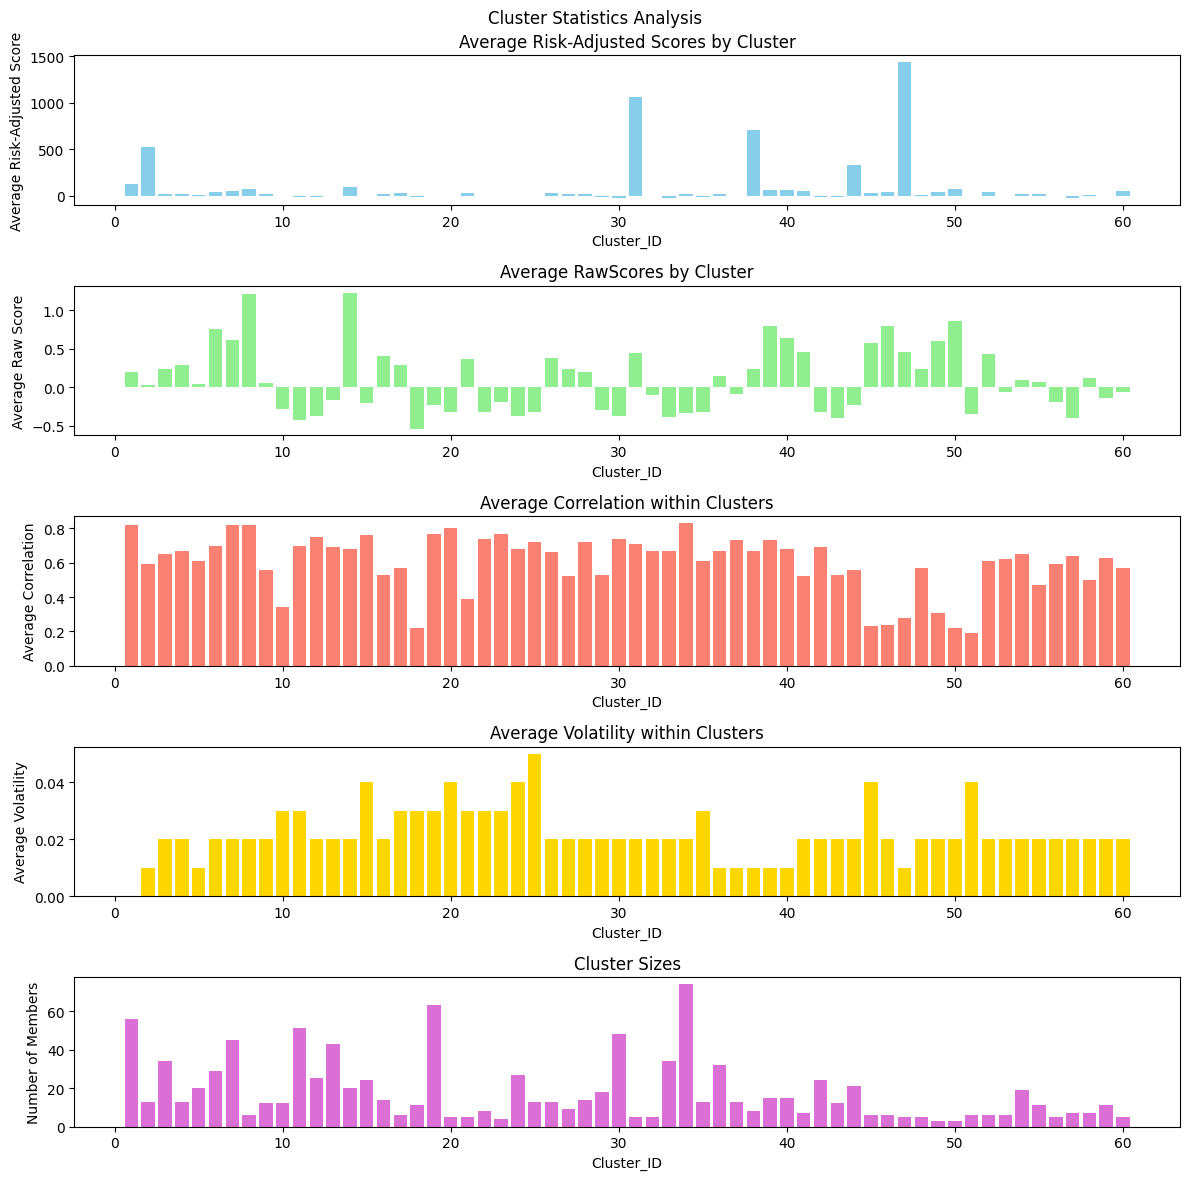

In [143]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
                     'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Plot 1 Average Risk-Adjusted Score
ax1.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], color='skyblue')
# ax1.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], color='lightgreen')
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
# ax2.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], color='lightgreen')
ax2.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], color='lightgreen')
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
ax3.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Correlation'], color='salmon')
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
ax4.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], color='gold')
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
ax5.bar(cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], color='orchid')
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [146]:
# Calculate summary statistics for cluster_stats_df
stats_summary = pd.DataFrame({
    'Count': cluster_stats_df.count(numeric_only=True),
    'Sum': cluster_stats_df.sum(numeric_only=True),
    'Mean': cluster_stats_df.mean(numeric_only=True),
    'Std': cluster_stats_df.std(numeric_only=True),
    'Mean+1Std (68%)': cluster_stats_df.mean(numeric_only=True) + cluster_stats_df.std(numeric_only=True),
    'Mean-1Std (68%)': cluster_stats_df.mean(numeric_only=True) - cluster_stats_df.std(numeric_only=True),
    'Mean+2Std (95%)': cluster_stats_df.mean(numeric_only=True) + 2*cluster_stats_df.std(numeric_only=True),
    'Mean-2Std (95%)': cluster_stats_df.mean(numeric_only=True) - 2*cluster_stats_df.std(numeric_only=True),
    'Min': cluster_stats_df.min(numeric_only=True),
    'Max': cluster_stats_df.max(numeric_only=True),
})

print("Summary Statistics for Cluster Data:")
display(stats_summary.round(4))

Summary Statistics for Cluster Data:


,Count,Sum,Mean,Std,Mean+1Std (68%),Mean-1Std (68%),Mean+2Std (95%),Mean-2Std (95%),Min,Max
Cluster_ID,60,1830.0000,30.5000,17.4642,47.9642,13.0358,65.4285,-4.4285,1.0000,60.0000
Size,60,1050.0000,17.5000,15.9910,33.4910,1.5090,49.4820,-14.4820,3.0000,74.0000
Avg_Correlation,60,36.1100,0.6018,0.1663,0.7681,0.4355,0.9344,0.2693,0.1900,0.8300
Avg_Raw_Score,60,5.5500,0.0925,0.4288,0.5213,-0.3363,0.9501,-0.7651,-0.5400,1.2300
Avg_Risk_Adj_Score,60,4825.7900,80.4298,252.5295,332.9593,-172.0997,585.4888,-424.6292,-28.3500,1436.4400
Avg_Volatility,60,1.3200,0.0220,0.0090,0.0310,0.0130,0.0400,0.0040,0.0000,0.0500


In [145]:
# Sort by Avg_Raw_Score in descending order
sorted_by_Avg_Raw_Score = cluster_stats_df.sort_values('Avg_Raw_Score', ascending=False)
print(f'sorted_by_Avg_Raw_Score')
display(sorted_by_Avg_Raw_Score.head(10))

sorted_by_Avg_Raw_Score


,Cluster_ID,Size,Avg_Correlation,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility
13,14,20,0.6800,1.2300,86.7000,0.0200
7,8,6,0.8200,1.2100,70.9500,0.0200
49,50,3,0.2200,0.8600,70.0300,0.0200
45,46,6,0.2400,0.7900,37.2500,0.0200
38,39,15,0.7300,0.7900,60.6700,0.0100
5,6,29,0.7000,0.7500,36.3200,0.0200
39,40,15,0.6800,0.6400,54.3700,0.0100
6,7,45,0.8200,0.6100,44.5300,0.0200
48,49,3,0.3100,0.6000,41.4700,0.0200
44,45,6,0.2300,0.5700,22.0400,0.0400
